In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# 데이터 불러오기
df = pd.read_csv('concrete.csv')

# 데이터 확인
print(df.shape)
print(df.head())

(1030, 9)
   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CompressiveStrength  
0          676.0   28                79.99  
1          676.0   28                61.89  
2          594.0  270                40.27  
3          594.0  365                41.05  
4          825.5  360                44.30  


In [4]:
# 특성과 레이블 분리
X = df.drop(columns=['CompressiveStrength'])  # 입력 데이터 (특성)
y = df['CompressiveStrength']  # 출력 데이터 (레이블)

In [5]:
# 2. 훈련과 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 3. 데이터 표준화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 첫 번째 은닉층
    tf.keras.layers.Dense(32, activation='relu'),  # 두 번째 은닉층
    # 출력층 (회귀 문제이므로 출력 뉴런은 1개, 분류문제면 타켓 개수 만큼 설정.)
    tf.keras.layers.Dense(1)
])

c:\Users\gh159\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 5. 모델 컴파일
model.compile(optimizer='adam', loss='mse')

In [9]:
# 5.1 조기 종료 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

In [10]:
# 6. 모델 학습 - 학습결과를 history변수에 저장
history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=1000, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1474.5072 - val_loss: 1437.3237
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1395.7117 - val_loss: 1317.9960
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1343.4086 - val_loss: 1137.7410
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1097.5582 - val_loss: 894.8732
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 900.4971 - val_loss: 619.9302
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 525.0409 - val_loss: 382.4120
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 346.3690 - val_loss: 242.5042
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 266.0940 - val_loss: 192.4993
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.1414 - val_loss: 178.5052
Epoch 10/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210.9302 - val_loss: 169.8046
Epoch 11/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.5343 - val_loss: 165.8003
E

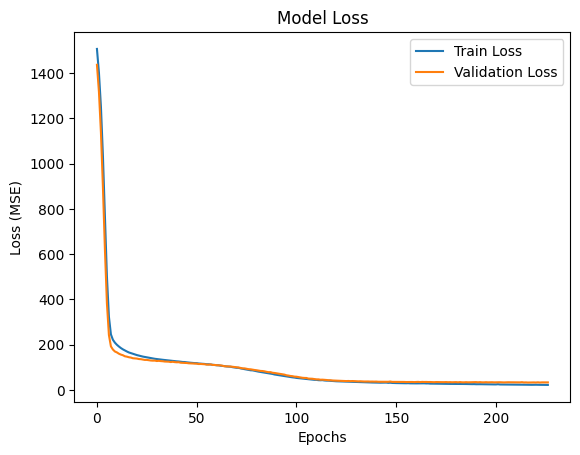

In [12]:
# 7. 학습 결과 시각화 (loss와 val_loss 그래프)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [13]:
# 8. 테스트 데이터로 모델 평가
y_pred = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 40.206274555656464


In [15]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison_df.head())

     Actual  Predicted
31    52.91  44.531460
109   55.90  42.307251
136   74.50  65.059479
88    35.30  38.149086
918   10.54  13.977793
